In [6]:
import numpy as np
from progressbar import ProgressBar
from algorithm.algorithms_known_parameter import * 
from bandit_process.arm_generator import *
from matplotlib import pyplot as plt
import matplotlib;matplotlib.rcParams['figure.figsize'] = (8,5)
import os
import math
import seaborn as sns
from bandit_process.arm_generator_with_parameter import *
sns.set(style='whitegrid', font_scale=1.75)

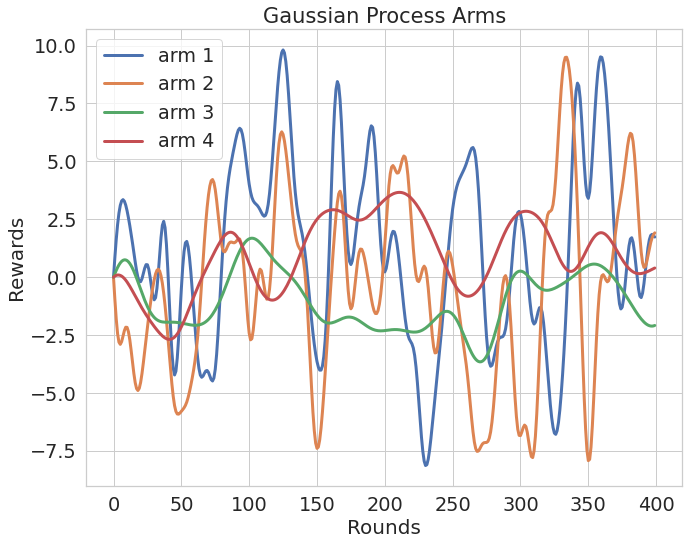

In [7]:
arm1=GP_Arm(lengthscale=6, variance=15,sigma=0.1, T=400)
arm2=GP_Arm(lengthscale=6, variance=15,sigma=0.1, T=400)
arm3=GP_Arm(lengthscale=18, variance=4,sigma=0.1, T=400)
arm4=GP_Arm(lengthscale=18, variance=4,sigma=0.1, T=400)

plt.figure(figsize=(10, 8))
plt.plot(arm1.arm_path,label='arm 1',linewidth=3)
plt.plot(arm2.arm_path,label='arm 2',linewidth=3)
plt.plot(arm3.arm_path,label='arm 3',linewidth=3)
plt.plot(arm4.arm_path,label='arm 4',linewidth=3)
plt.xlabel('Rounds',fontsize=20)
plt.ylabel('Rewards',fontsize=20)
plt.title('Gaussian Process Arms')
plt.tight_layout()
plt.legend()

#plt.savefig('Gaussian Process Arms.png')

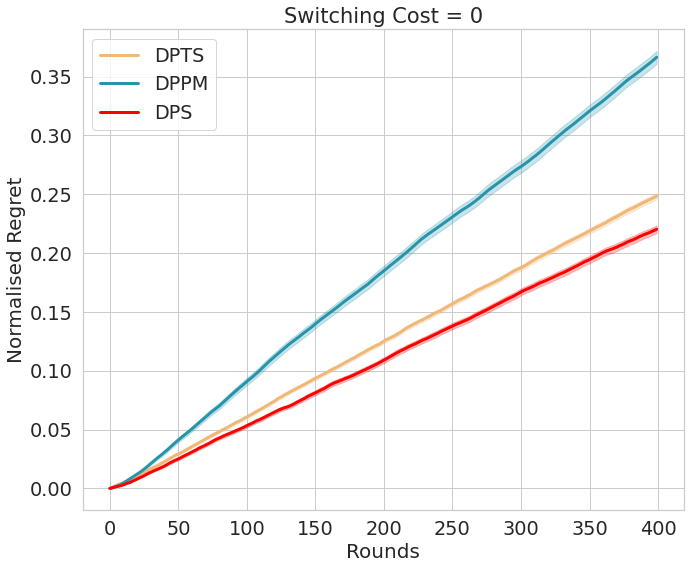

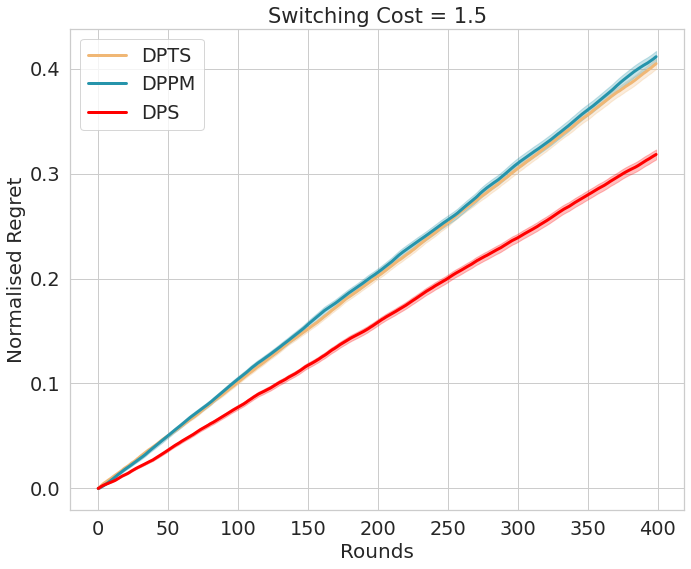

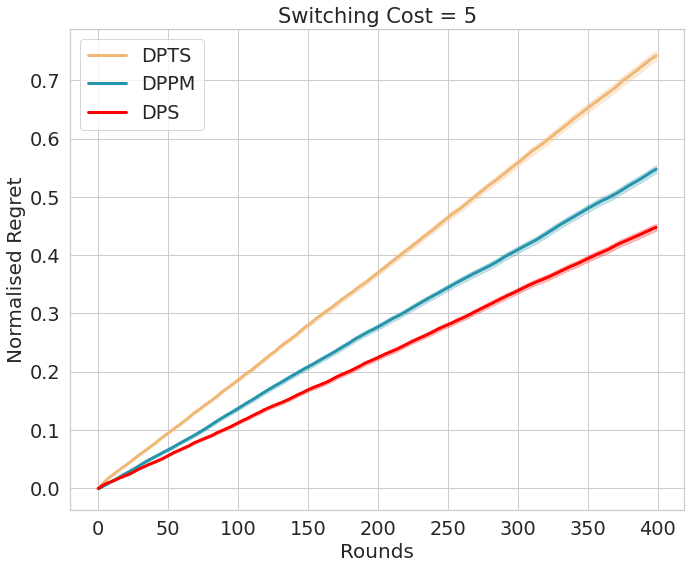

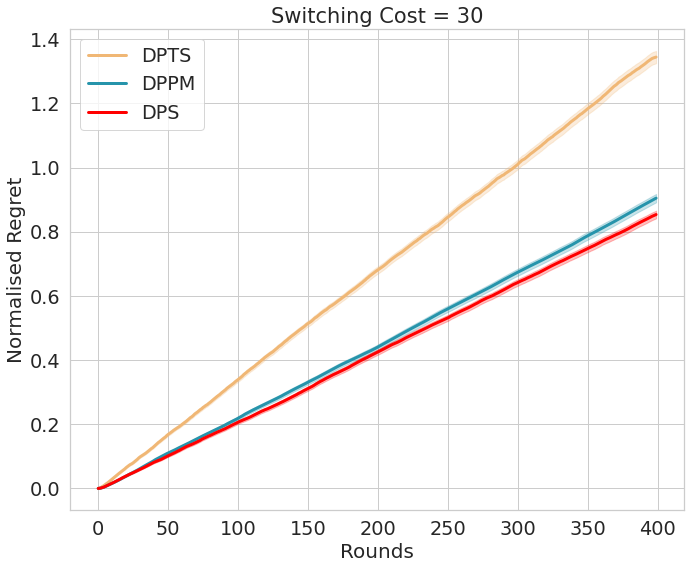

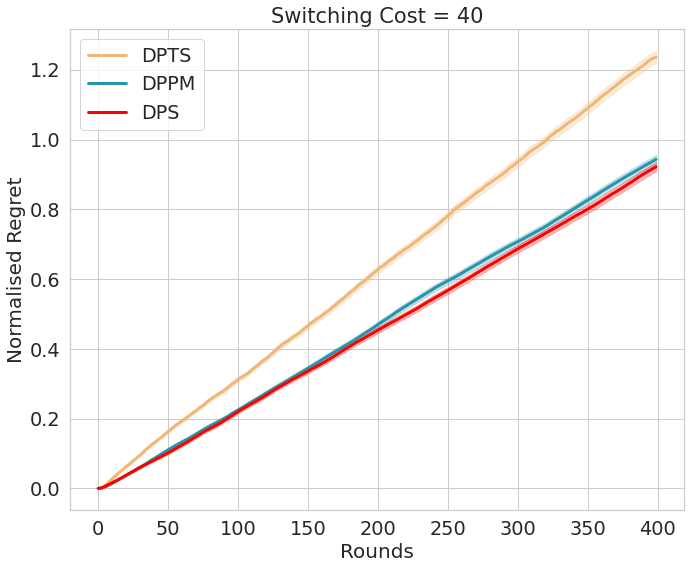

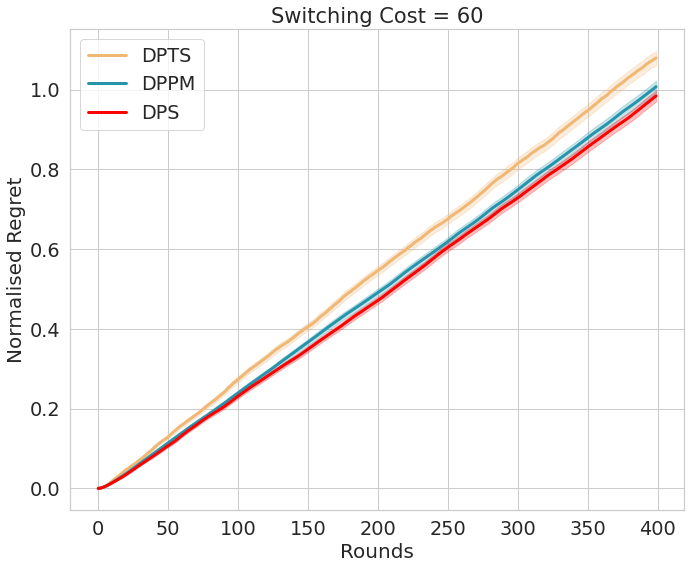

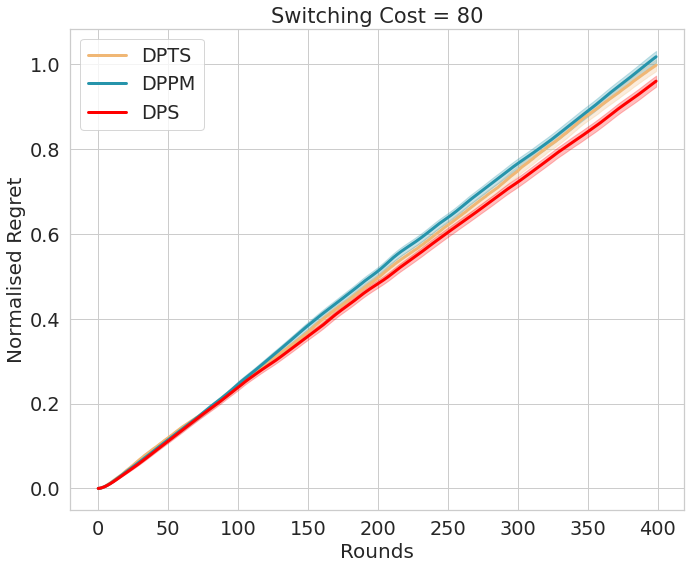

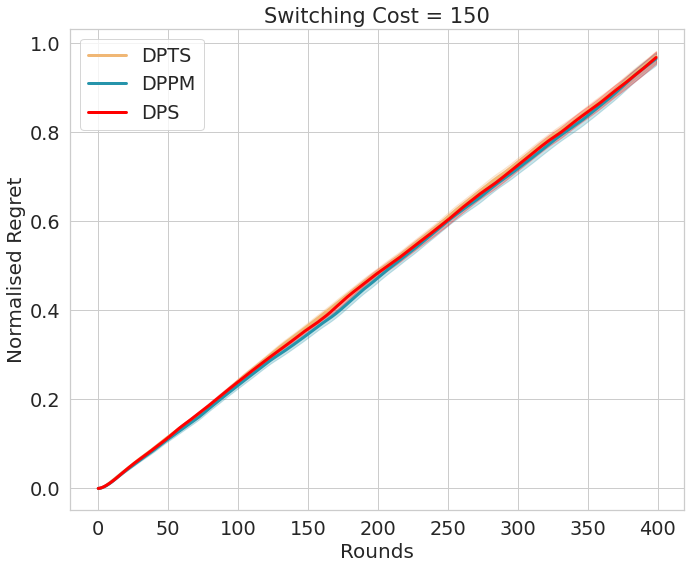

In [8]:
N = 250
T = 400
cost_holder = [0,1.5,5,30,40,60,80,150]

for C in cost_holder:
    
    regret_record1 = np.genfromtxt(os.path.join(os.getcwd(),'new_result/4arms_regret_DPTS_cost'+str(C)+'.csv'), delimiter=',')
    regret_record2 = np.genfromtxt(os.path.join(os.getcwd(),'new_result/4arms_regret_DPPM_cost'+str(C)+'.csv'), delimiter=',')
    regret_record3 = np.genfromtxt(os.path.join(os.getcwd(),'new_result/simulation_4arms_regret_DPTS_cost'+str(C)+'.csv'), delimiter=',')


    regret_cumsum1=np.cumsum(regret_record1,axis=1)
    regret_cumsum2=np.cumsum(regret_record2,axis=1)
    regret_cumsum3=np.cumsum(regret_record3,axis=1)



    cumsum_average1=np.mean(regret_cumsum1,axis=0)
    cumsum_average2=np.mean(regret_cumsum2,axis=0)
    cumsum_average3=np.mean(regret_cumsum3,axis=0)


    cumsum_std1=np.sqrt(np.var(regret_cumsum1,axis=0))/math.sqrt(N)
    cumsum_std2=np.sqrt(np.var(regret_cumsum2,axis=0))/math.sqrt(N)
    cumsum_std3=np.sqrt(np.var(regret_cumsum3,axis=0))/math.sqrt(N)


    plt.rcParams['font.size'] = '20'
    plt.rc('font', family='Times New Roman')
    plt.figure(figsize=(10, 8))

    plt.plot(cumsum_average1,color='#F0B775' ,linewidth=3,label='DPTS')
    plt.fill_between(range(T), cumsum_average1-cumsum_std1, cumsum_average1+cumsum_std1, color= '#F0B775', alpha=0.25)

    plt.plot(cumsum_average2,label='DPPM',linewidth=3,color='#2694ab')
    plt.fill_between(range(T), cumsum_average2-cumsum_std2, cumsum_average2+cumsum_std2,color='#2694ab', alpha=0.25)

    plt.plot(cumsum_average3,label='DPS',color='red',linewidth=3)
    plt.fill_between(range(T), cumsum_average3-cumsum_std3, cumsum_average3+cumsum_std3, color='red',alpha=0.25)



    plt.xlabel('Rounds',fontsize=20)
    plt.ylabel('Normalised Regret',fontsize=20)
    plt.tight_layout()
    plt.title('Switching Cost = '+str(C))
    plt.legend()
    #plt.savefig('4arms_SC'+str(C)+'.png')

In [9]:
print('The result of DPTS: ')

for C in [0,1.5,5,30,40,60,80,150]:
    
    choice_DPTS = np.genfromtxt(os.path.join(os.getcwd(),'new_result/4arms_choice_DPTS_cost'+str(C)+'.csv'), delimiter=',')
    print(f'when the switching cost is {C}, the percentage of arm 3 and arm 4 is {np.mean((choice_DPTS==2)+(choice_DPTS==3))},,with standard error {np.sqrt(np.var((np.average(((choice_DPTS==2)+(choice_DPTS==3))/math.sqrt(250),axis=1))))}')

The result of DPTS: 
when the switching cost is 0, the percentage of arm 3 and arm 4 is 0.37679,,with standard error 0.004274071080363543
when the switching cost is 1.5, the percentage of arm 3 and arm 4 is 0.37433,,with standard error 0.004490445902134885
when the switching cost is 5, the percentage of arm 3 and arm 4 is 0.37534,,with standard error 0.0047222386216708686
when the switching cost is 30, the percentage of arm 3 and arm 4 is 0.34085,,with standard error 0.0061892172364524396
when the switching cost is 40, the percentage of arm 3 and arm 4 is 0.33433,,with standard error 0.007878432864472474
when the switching cost is 60, the percentage of arm 3 and arm 4 is 0.30547,,with standard error 0.01564621412355078
when the switching cost is 80, the percentage of arm 3 and arm 4 is 0.46996,,with standard error 0.027561150077600165
when the switching cost is 150, the percentage of arm 3 and arm 4 is 0.464,,with standard error 0.03154070386025016


In [10]:
print('The result of DPPM: ')

for C in [0,1.5,5,30,40,60,80,150]:
    
    choice_DPPM = np.genfromtxt(os.path.join(os.getcwd(),'new_result/4arms_choice_DPPM_cost'+str(C)+'.csv'), delimiter=',')
    print(f'when the switching cost is {C}, the percentage of arm 3 and arm 4 is {np.mean((choice_DPPM==2)+(choice_DPPM==3))},with standard error {np.sqrt(np.var((np.average(((choice_DPPM==2)+(choice_DPPM==3))/math.sqrt(250),axis=1))))}')

The result of DPPM: 
when the switching cost is 0, the percentage of arm 3 and arm 4 is 0.62495,with standard error 0.007443714798405427
when the switching cost is 1.5, the percentage of arm 3 and arm 4 is 0.62797,with standard error 0.008159461771465072
when the switching cost is 5, the percentage of arm 3 and arm 4 is 0.69626,with standard error 0.00859000870779535
when the switching cost is 30, the percentage of arm 3 and arm 4 is 0.7336,with standard error 0.021377688368951396
when the switching cost is 40, the percentage of arm 3 and arm 4 is 0.58075,with standard error 0.029383513234465333
when the switching cost is 60, the percentage of arm 3 and arm 4 is 0.544,with standard error 0.031500095237951255
when the switching cost is 80, the percentage of arm 3 and arm 4 is 0.5,with standard error 0.031622776601683784
when the switching cost is 150, the percentage of arm 3 and arm 4 is 0.556,with standard error 0.031423812626732606


In [11]:
print('The result of DPS: ')

for C in [0,1.5,5,30,40,60,80,150]:
    
    choice_DPS = np.genfromtxt(os.path.join(os.getcwd(),'new_result/simulation_4arms_choice_DPTS_cost'+str(C)+'.csv'), delimiter=',')
    print(f'when the switching cost is {C}, the percentage of arm 3 and arm 4 is {np.mean((choice_DPS==2)+(choice_DPS==3))}, with standard error {np.sqrt(np.var((np.average(((choice_DPS==2)+(choice_DPS==3))/math.sqrt(250),axis=1))))}')

The result of DPS: 
when the switching cost is 0, the percentage of arm 3 and arm 4 is 0.42256, with standard error 0.006309341138344001
when the switching cost is 1.5, the percentage of arm 3 and arm 4 is 0.4466, with standard error 0.006772898936201541
when the switching cost is 5, the percentage of arm 3 and arm 4 is 0.44826, with standard error 0.007214145105277545
when the switching cost is 30, the percentage of arm 3 and arm 4 is 0.51588, with standard error 0.01717201509433298
when the switching cost is 40, the percentage of arm 3 and arm 4 is 0.55728, with standard error 0.024183035508388927
when the switching cost is 60, the percentage of arm 3 and arm 4 is 0.42353, with standard error 0.030719301040225504
when the switching cost is 80, the percentage of arm 3 and arm 4 is 0.43896, with standard error 0.031337167606533926
when the switching cost is 150, the percentage of arm 3 and arm 4 is 0.428, with standard error 0.0312931941482489


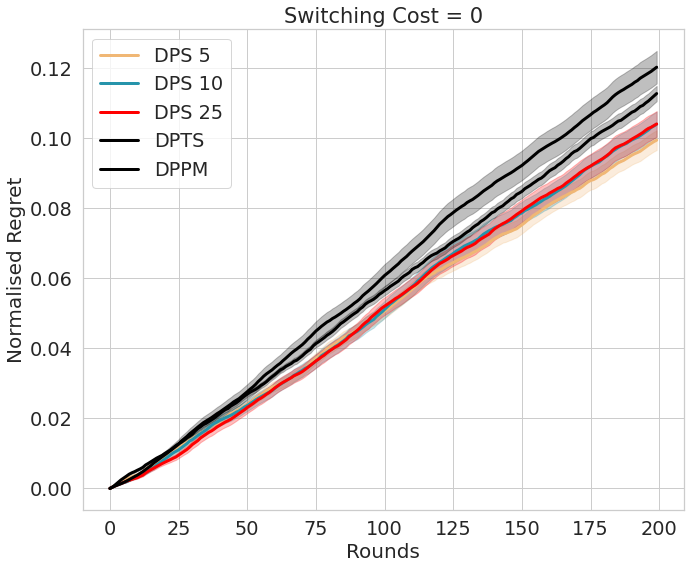

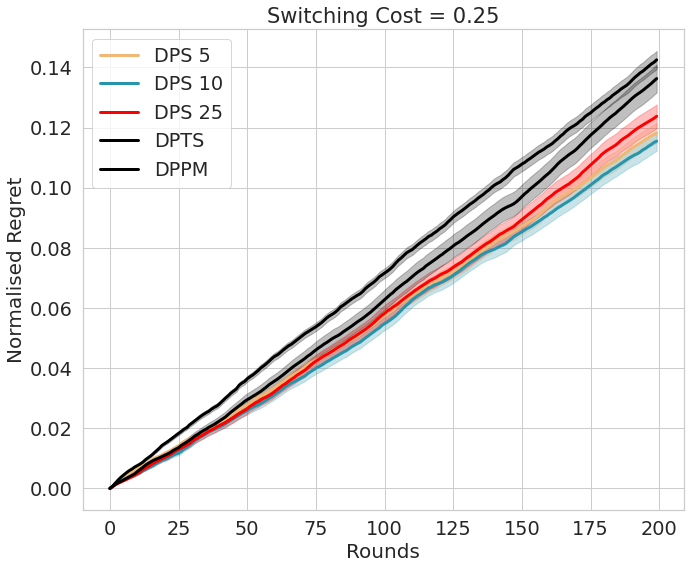

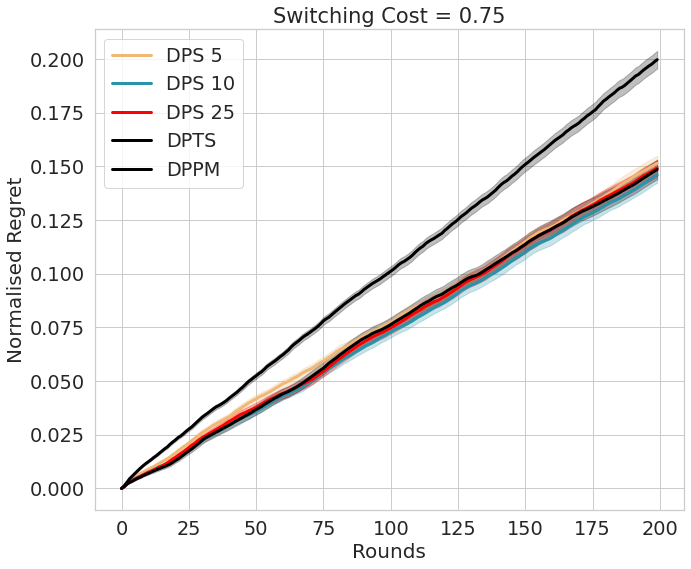

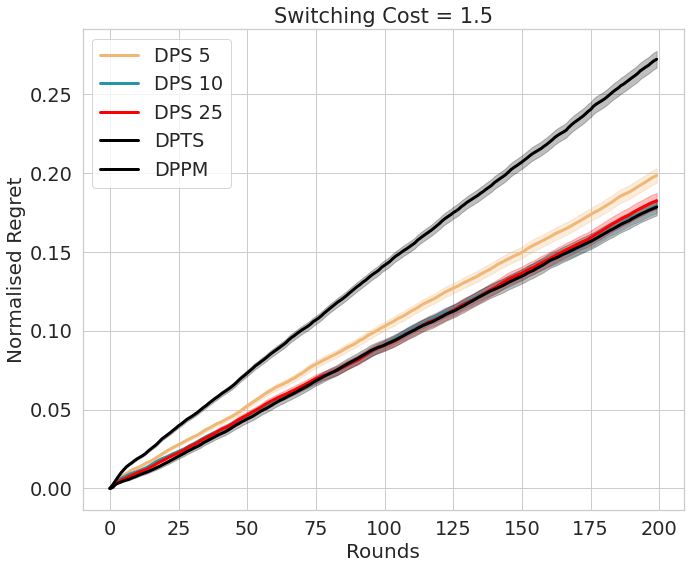

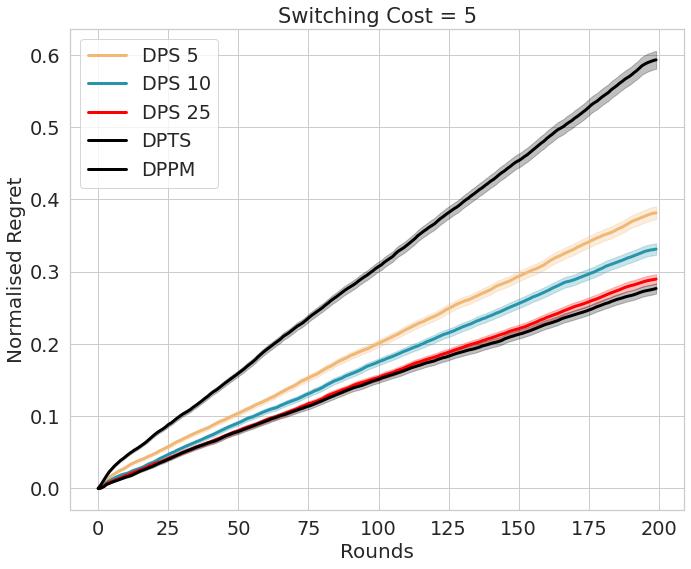

In [14]:
N = 250
T = 200
cost_holder = [0,0.25,0.75,1.5,5]

for C in cost_holder:
    
    regret_record1 = np.genfromtxt(os.path.join(os.getcwd(),'new_result/2arm_experiments/simulation_2arms_regret_DPS_s5_cost'+str(C)+'.csv'), delimiter=',')
    regret_record2 = np.genfromtxt(os.path.join(os.getcwd(),'new_result/2arm_experiments/simulation_2arms_regret_DPS_s10_cost'+str(C)+'.csv'), delimiter=',')
    regret_record3 = np.genfromtxt(os.path.join(os.getcwd(),'new_result/2arm_experiments/simulation_2arms_regret_DPS_s25_cost'+str(C)+'.csv'), delimiter=',')
    regret_record4 = np.genfromtxt(os.path.join(os.getcwd(),'new_result/2arm_experiments/2arms_regret_DPTS_cost'+str(C)+'.csv'), delimiter=',')
    regret_record5 = np.genfromtxt(os.path.join(os.getcwd(),'new_result/2arm_experiments/2arms_regret_DPPM_cost'+str(C)+'.csv'), delimiter=',')


    regret_cumsum1=np.cumsum(regret_record1,axis=1)
    regret_cumsum2=np.cumsum(regret_record2,axis=1)
    regret_cumsum3=np.cumsum(regret_record3,axis=1)
    regret_cumsum4=np.cumsum(regret_record4,axis=1)
    regret_cumsum5=np.cumsum(regret_record5,axis=1)



    cumsum_average1=np.mean(regret_cumsum1,axis=0)
    cumsum_average2=np.mean(regret_cumsum2,axis=0)
    cumsum_average3=np.mean(regret_cumsum3,axis=0)
    cumsum_average4=np.mean(regret_cumsum4,axis=0)    
    cumsum_average5=np.mean(regret_cumsum5,axis=0)




    cumsum_std1=np.sqrt(np.var(regret_cumsum1,axis=0))/math.sqrt(N)
    cumsum_std2=np.sqrt(np.var(regret_cumsum2,axis=0))/math.sqrt(N)
    cumsum_std3=np.sqrt(np.var(regret_cumsum3,axis=0))/math.sqrt(N)
    cumsum_std4=np.sqrt(np.var(regret_cumsum4,axis=0))/math.sqrt(N)
    cumsum_std5=np.sqrt(np.var(regret_cumsum5,axis=0))/math.sqrt(N)


    plt.rcParams['font.size'] = '20'
    plt.rc('font', family='Times New Roman')
    plt.figure(figsize=(10, 8))

    plt.plot(cumsum_average1,color='#F0B775' ,linewidth=3,label='DPS 5')
    plt.fill_between(range(T), cumsum_average1-cumsum_std1, cumsum_average1+cumsum_std1, color= '#F0B775', alpha=0.25)

    plt.plot(cumsum_average2,label='DPS 10',linewidth=3,color='#2694ab')
    plt.fill_between(range(T), cumsum_average2-cumsum_std2, cumsum_average2+cumsum_std2,color='#2694ab', alpha=0.25)

    plt.plot(cumsum_average3,label='DPS 25',color='red',linewidth=3)
    plt.fill_between(range(T), cumsum_average3-cumsum_std3, cumsum_average3+cumsum_std3, color='red',alpha=0.25)
    
    plt.plot(cumsum_average4,label='DPTS',color='black',linewidth=3)
    plt.fill_between(range(T), cumsum_average4-cumsum_std4, cumsum_average4+cumsum_std4,color='black',alpha=0.25)
    
    plt.plot(cumsum_average5,label='DPPM',color='black',linewidth=3)
    plt.fill_between(range(T), cumsum_average5-cumsum_std5, cumsum_average5+cumsum_std5, color='black',alpha=0.25)



    plt.xlabel('Rounds',fontsize=20)
    plt.ylabel('Normalised Regret',fontsize=20)
    plt.tight_layout()
    plt.title('Switching Cost = '+str(C))
    plt.legend()
    #plt.savefig('4arms_SC'+str(C)+'.png')